In [34]:
import matplotlib
import pandas as pd
import numpy as np
import descartes
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as st
import scipy
import xgboost as xgb
import lightgbm as lgb
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
from scipy.stats import norm

### Fonctions

In [23]:
#calculer la corrélation entre les variables quantitatives
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['valeur_fonciere'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')  

In [2]:
df_full20 = pd.read_csv('2020-full.csv')
df_full20.head(5)

C:\Users\33658\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,12,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323522,46.171899
1,2020-2,2020-01-07,1,Vente,75000.0,NaN,NaN,RUE DE LA CHARTREUSE,0064,1960.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,610.0,5.226197,46.184538
2,2020-3,2020-01-14,1,Vente,89000.0,NaN,NaN,VACAGNOLE,B112,1340.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,600.0,NaN,NaN
3,2020-3,2020-01-14,1,Vente,89000.0,NaN,NaN,VACAGNOLE,B112,1340.0,...,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,491.0,NaN,NaN
4,2020-4,2020-01-22,1,Vente,209950.0,11.0,NaN,RUE REYER,3340,1000.0,...,Maison,78.0,5.0,S,sols,NaN,NaN,242.0,5.219902,46.196484


In [3]:
df_full20.isnull().sum()/len(df_full20)*100

id_mutation                       0.000000
date_mutation                     0.000000
numero_disposition                0.000000
nature_mutation                   0.000000
valeur_fonciere                   1.176271
adresse_numero                   37.563308
adresse_suffixe                  95.480139
adresse_nom_voie                  1.141330
adresse_code_voie                 1.134681
code_postal                       1.135527
code_commune                      0.000000
nom_commune                       0.000000
code_departement                  0.000000
ancien_code_commune             100.000000
ancien_nom_commune              100.000000
id_parcelle                       0.000000
ancien_id_parcelle              100.000000
numero_volume                    99.736309
lot1_numero                      66.840365
lot1_surface_carrez              90.269796
lot2_numero                      92.825095
lot2_surface_carrez              97.599337
lot3_numero                      98.861450
lot3_surfac

In [4]:
df_final = df_full20.drop(['numero_disposition',
                          'ancien_code_commune',
                          'adresse_suffixe',
                           'ancien_nom_commune',
                           'ancien_id_parcelle',
                           'numero_volume',
                           'lot1_numero',
                           'lot1_surface_carrez',
                           'lot2_numero',
                           'lot2_surface_carrez',
                           'lot3_numero',
                           'lot3_surface_carrez',
                           'lot4_numero',
                           'lot4_surface_carrez',
                           'lot5_numero',
                           'lot5_surface_carrez',
                           'code_nature_culture',
                           'nature_culture',
                           'code_nature_culture_speciale',
                           'nature_culture_speciale'],axis= 1)

In [6]:
df_final['code_postal'] = df_final['code_postal'].astype('object')
df_final['code_type_local'] = df_final['code_type_local'].astype('object')
df_final['type_local'] = df_final['type_local'].astype('object')
df_final['nombre_pieces_principales'] = df_final['nombre_pieces_principales'].astype('object')
df_final['code_departement'] = df_final['code_departement'].astype('object')
df_final['code_commune'] = df_final['code_commune'].astype('object')
df_final['nombre_lots'] = df_final['nombre_lots'].astype('float64')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827105 entries, 0 to 827104
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_mutation                827105 non-null  object 
 1   date_mutation              827105 non-null  object 
 2   nature_mutation            827105 non-null  object 
 3   valeur_fonciere            817376 non-null  float64
 4   adresse_numero             516417 non-null  float64
 5   adresse_nom_voie           817665 non-null  object 
 6   adresse_code_voie          817720 non-null  object 
 7   code_postal                817713 non-null  object 
 8   code_commune               827105 non-null  object 
 9   nom_commune                827105 non-null  object 
 10  code_departement           827105 non-null  object 
 11  id_parcelle                827105 non-null  object 
 12  nombre_lots                827105 non-null  float64
 13  code_type_local            46

In [7]:
df_final['type_local'].value_counts(dropna = False, normalize = True).head()

NaN                                         0.439660
Maison                                      0.214562
Appartement                                 0.179718
Dépendance                                  0.128974
Local industriel. commercial ou assimilé    0.037086
Name: type_local, dtype: float64

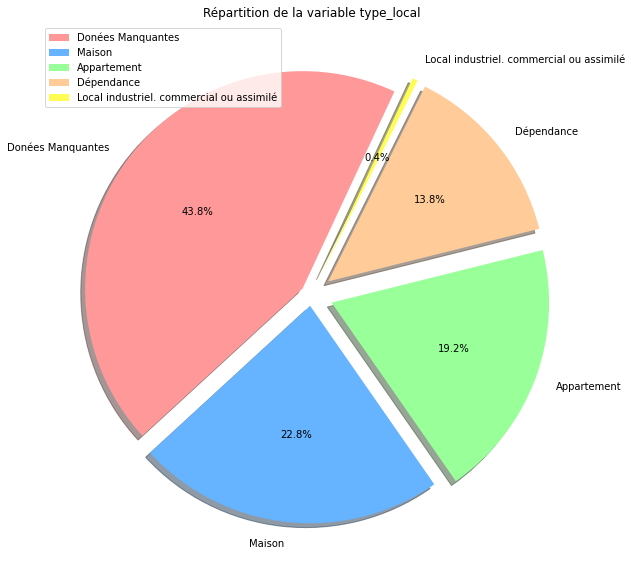

In [8]:
plt.figure(figsize=(10,10))
labels = ['Donées Manquantes', 'Maison', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [41, 21.4, 18, 12.9, 0.37]
explode = (0.05,0.05,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable type_local')
plt.legend()
plt.show()

In [9]:
df_final['code_type_local'].value_counts(dropna = False, normalize = True).head()

NaN    0.439660
1.0    0.214562
2.0    0.179718
3.0    0.128974
4.0    0.037086
Name: code_type_local, dtype: float64

In [10]:
df_final['nature_mutation'].value_counts(dropna = False, normalize = True).head()

Vente                                 0.919323
Vente en l'état futur d'achèvement    0.068876
Echange                               0.008172
Vente terrain à bâtir                 0.002819
Adjudication                          0.000566
Name: nature_mutation, dtype: float64

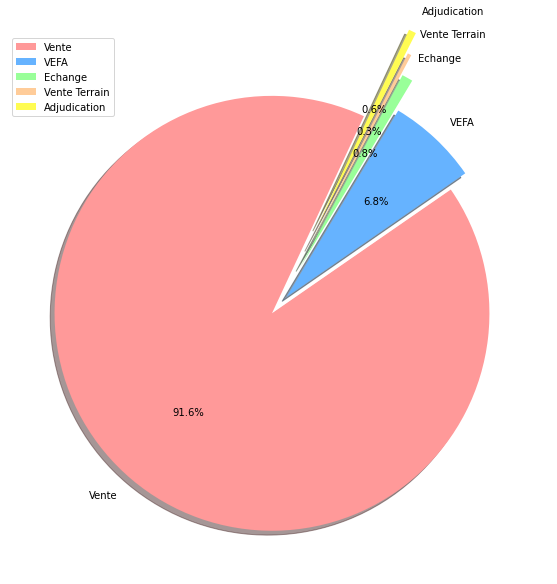

In [11]:
# Visualiser la répartition de la nature de mutation
plt.figure(figsize=(10,10))
labels = ['Vente', 'VEFA', 'Echange', 'Vente Terrain', 'Adjudication']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [92, 6.8, 0.82, 0.28, 0.56]
explode = (0.05,0.05,0.2,0.3,0.4)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.legend()
plt.show()

In [12]:
# J'impute mes données qui manquent
df_final['adresse_numero'] = df_full20['adresse_numero'].fillna("None")
df_final['adresse_nom_voie'] = df_full20['adresse_nom_voie'].fillna("None")
df_final['adresse_code_voie'] = df_full20['adresse_code_voie'].fillna("None")
df_final['code_type_local'] = df_full20['code_type_local'].fillna("None")
df_final['type_local'] = df_full20['type_local'].fillna("None")
df_final['valeur_fonciere'] = df_final['valeur_fonciere'].transform(lambda x: x.fillna(x.mean()))
df_final['surface_reelle_bati'] = df_full20['surface_reelle_bati'].fillna(0)
df_final['nombre_pieces_principales'] = df_full20['nombre_pieces_principales'].fillna(0)
df_final['longitude'] = df_full20['longitude'].fillna(0)
df_final['latitude'] = df_full20['latitude'].fillna(0)
df_final['surface_reelle_bati'] = df_full20['surface_reelle_bati'].fillna(0)
df_final['surface_terrain'] = df_final['surface_terrain'].fillna(0)

In [13]:
df_final.isnull().sum()/len(df_full20)*100

id_mutation                  0.000000
date_mutation                0.000000
nature_mutation              0.000000
valeur_fonciere              0.000000
adresse_numero               0.000000
adresse_nom_voie             0.000000
adresse_code_voie            0.000000
code_postal                  1.135527
code_commune                 0.000000
nom_commune                  0.000000
code_departement             0.000000
id_parcelle                  0.000000
nombre_lots                  0.000000
code_type_local              0.000000
type_local                   0.000000
surface_reelle_bati          0.000000
nombre_pieces_principales    0.000000
surface_terrain              0.000000
longitude                    0.000000
latitude                     0.000000
dtype: float64

In [14]:
filtered_df = df_final[(df_final["nature_mutation"] == 'Vente')  &  (df_final["code_type_local"] == 4)]

In [15]:
filtered_df.head(3)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
12,2020-8,2020-01-17,Vente,189000.0,5462.0,BEL AIR,B001,1340.0,1266,Montrevel-en-Bresse,1,01266000AE0092,0.0,4.0,Local industriel. commercial ou assimilé,0.0,0.0,3611.0,5.122198,46.330015
47,2020-24,2020-01-31,Vente,1250000.0,85.0,AV AMEDEE MERCIER,0225,1000.0,1053,Bourg-en-Bresse,1,01053000CK0095,0.0,4.0,Local industriel. commercial ou assimilé,558.0,0.0,1166.0,5.249936,46.201714
48,2020-24,2020-01-31,Vente,1250000.0,85.0,AV AMEDEE MERCIER,0225,1000.0,1053,Bourg-en-Bresse,1,01053000CK0095,0.0,4.0,Local industriel. commercial ou assimilé,554.0,0.0,1166.0,5.249936,46.201714


In [18]:
#Je Vérifie le nombre de variable quantitative et qualitative dans le jeu de donnée
num_vars = filtered_df.dtypes[filtered_df.dtypes != "object"].index
cat_vars = filtered_df.dtypes[filtered_df.dtypes == "object"].index
print("Nombres des variables quantitatives: ", len(num_vars))
print("Nombres des variables qualitatives: ", len(cat_vars))

Nombres des variables quantitatives:  7
Nombres des variables qualitatives:  13


C:\Users\33658\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


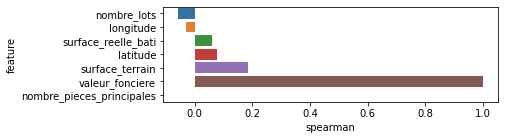

In [25]:
#J'appel ma fonction créé au préalable merci flo :)
features = num_vars
spearman(filtered_df, features)

<AxesSubplot:>

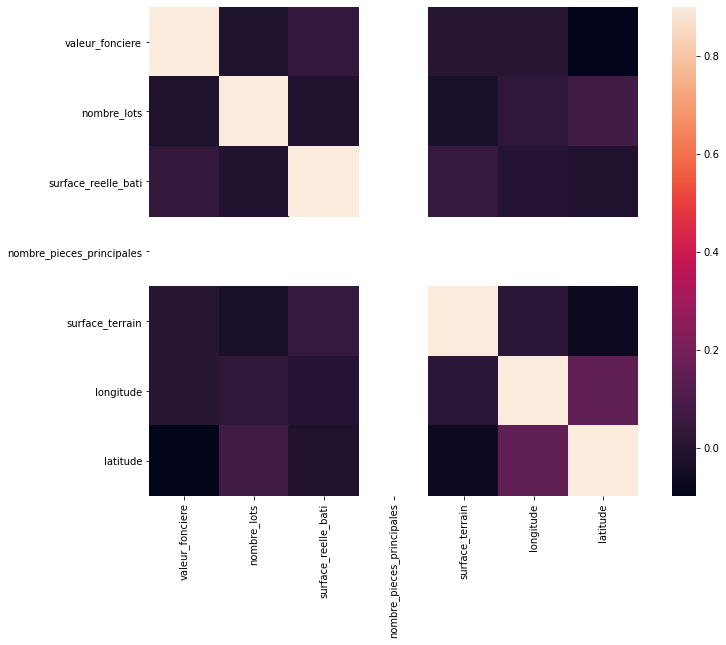

In [27]:
#Matrice de corrélation entre les variables (heatmap)
corrmat = filtered_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

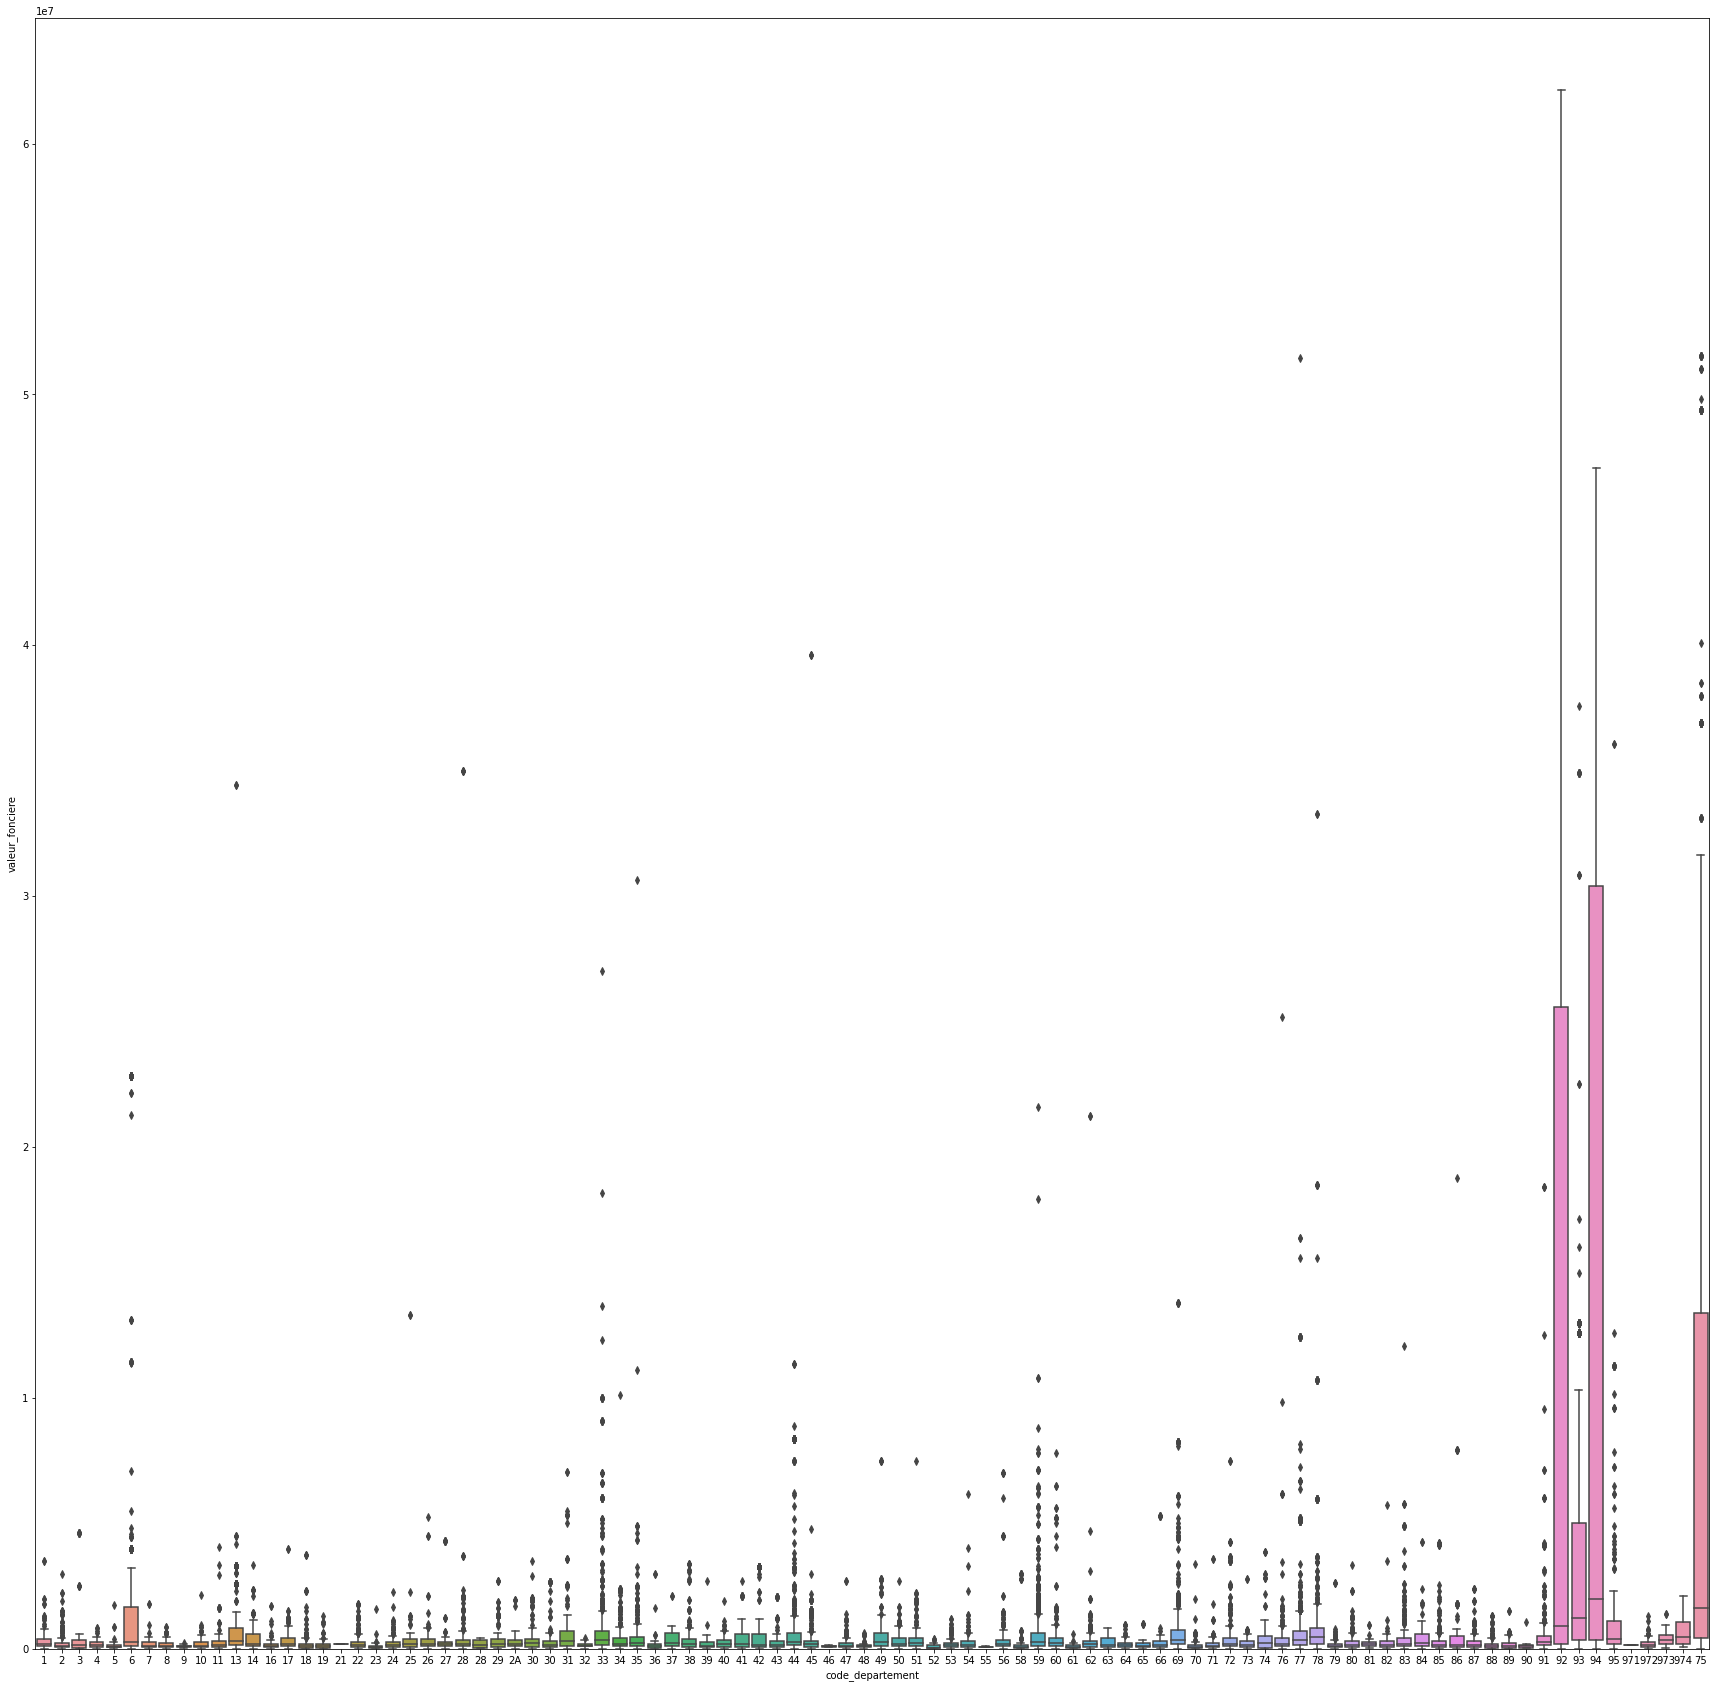

In [28]:
data = pd.concat([filtered_df['valeur_fonciere'], filtered_df['code_departement']], axis=1)
f, ax = plt.subplots(figsize=(30, 30))
fig = sns.boxplot(x=filtered_df['code_departement'], y=filtered_df['valeur_fonciere'], data=data)
fig.axis(ymin=0, ymax=65000000);

### Je vois bien l'impacte de la localisation a avec le prix

C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 9.817272
Kurtosis: 123.005223


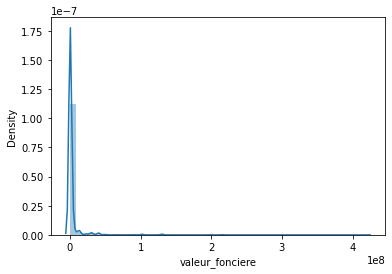

In [31]:
sns.distplot(filtered_df['valeur_fonciere'])

print("Skewness: %f" % filtered_df['valeur_fonciere'].skew())
print("Kurtosis: %f" % filtered_df['valeur_fonciere'].kurt())

### la distribution de la valeur fonciere est sysmétrie positivement le type de bien est redondants

C:\Users\33658\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


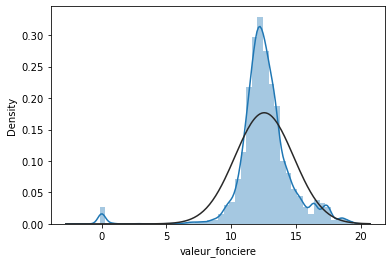

<Figure size 432x288 with 0 Axes>

In [30]:
y = np.log(filtered_df['valeur_fonciere'])
sns.distplot(y, fit=norm);
fig = plt.figure()

In [37]:
categories = ['code_departement', 'code_postal', 'type_local']

for cat in categories:
    cat_val = df_full20[cat].unique()
    print('{} ({}):'.format(cat,len(cat_val)))
    print('{}\n'.format(cat_val))

code_departement (99):
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28
 '28' '29' '2A' '2B' '30' 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 69 70 71 72
 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 971 972
 973 974 75]

code_postal (5444):
[ 1250.  1960.  1340. ... 75020. 75004. 75002.]

type_local (5):
[nan 'Maison' 'Local industriel. commercial ou assimilé' 'Dépendance'
 'Appartement']



In [39]:
y = df_full20['valeur_fonciere']
X = df_full20.drop(['valeur_fonciere'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42, shuffle=True)